In [1]:
# Import required packages
# Working with multidimensional number arrays
import numpy as np
# Plotting
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("iris.data", header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# with open python method that helps to open text files
# https://note.nkmk.me/en/python-file-io-open-with/

# rt means to read a text file where r stands for read and t for text file
with open("iris.names", "rt") as file:
    content = file.read()
    print(content)

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

Labelling columns with appropriate names based on the information in the iris.names folder that was opened above.

In [4]:
feature_names = ["sepal_length_(cm)", "sepal_width_(cm)", "petal_length_(cm)", "petal_width_(cm)"]
df.columns = feature_names + ["class"]
df.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


https://note.nkmk.me/en/python-pandas-str-replace-strip-etc/

In [5]:
# Cleaning the df
df["class"] = df["class"].str.replace("Iris-", "")
df.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Calculate summary statistics
See https://numpy.org/doc/stable//reference/routines.statistics.html to calculate mean, standard deviation, minima, maxima and median

Read https://docs.python.org/3/library/functions.html about built-in python round() function which is used to round numbers.

See https://www.w3schools.com/python/ref_string_replace.asp to replace a certain value in a string with another value

See https://numpy.org/doc/2.1/reference/generated/numpy.empty.html to create an empty numpy array

See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html to working with pandas df

See https://www.geeksforgeeks.org/enumerate-in-python/ to read about enumerate() function which allows to track the number of for loop iterations

Convert pandas df to numpy
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html

Transpose numpy array
https://numpy.org/doc/2.2/reference/generated/numpy.transpose.html

In [6]:
# Define a function that computes summary statistics using the numpy
def summary_statistics(iris_data, feature_names):
    
    
    # Obtain the feature names
    feature_names = iris_data.columns
    
    # Convert pandas df to numpy array
    iris_data = iris_data.to_numpy()
    # Transpose the iris dataset to separate all values for each feature in a separate list
    iris_data = np.transpose(iris_data)
    
    
    # Create an empty pandas dataframe 
    df = pd.DataFrame(np.empty((4,5)))
    # Set the index of df as feature names
    df.index = feature_names
    # Set the column names of df 
    df.columns = ["mean", "std", "minima", "maxima", "median"]
    
    # Go through each feature in the iris_transposed
    # and calculate summary statistics
    # Use enumerate() function to loop through the object
    # enumerate() outputs the # of iterations and values from the object
    for count, feature in enumerate(iris_data):
        df.loc[feature_names[count], "mean"] = round(np.mean(feature), 2) # Compute mean
        df.loc[feature_names[count], "std"] = round(np.std(feature), 2) # Compute standard deviation
        df.loc[feature_names[count], "minima"] = round(np.min(feature), 2) # Compute the minimum
        df.loc[feature_names[count], "maxima"] = round(np.max(feature), 2) # Compute the maxima
        df.loc[feature_names[count], "median"] = round(np.median(feature), 2) # Compute the median

    return df

In [7]:
sum_stats = summary_statistics(df.iloc[:,:4], feature_names)
sum_stats

,mean,std,minima,maxima,median
sepal_length_(cm),5.84,0.83,4.3,7.9,5.80
sepal_width_(cm),3.05,0.43,2.0,4.4,3.00
petal_length_(cm),3.76,1.76,1.0,6.9,4.35
petal_width_(cm),1.20,0.76,0.1,2.5,1.30


convert pandas df to a text file
https://saturncloud.io/blog/how-to-write-a-pandas-dataframe-to-a-txt-file/#:~:text=txt%20File-,To%20write%20a%20Pandas%20dataframe%20to%20a%20.,txt

In [8]:
sum_stats.to_csv('sum_stats.txt', sep='\t', index=True)

## Histograms

make all letters lower case
https://zerotomastery.io/blog/python-lowercase/#:~:text=The%20lower()%20method%20is%20a%20built%2Din%20function%20in,string%20with%20the%20changes%20applied.

In [9]:
# Convert pandas df to numpy array
iris_data = df.iloc[:,:4].to_numpy()
# Transpose the iris dataset to separate all values for each feature in a separate list
iris_data = np.transpose(iris_data)
iris_data[1]

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
       3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
       3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
       3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
       3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
       2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
       3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])

See https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/ and https://matplotlib.org/stable/gallery/statistics/hist.html for histogram plotting

See https://www.w3schools.com/python/ref_string_capitalize.asp for string capitalisation

See https://matplotlib.org/stable/users/explain/axes/constrainedlayout_guide.html#sphx-glr-users-explain-axes-constrainedlayout-guide-py for plotting subplots with matplotlib

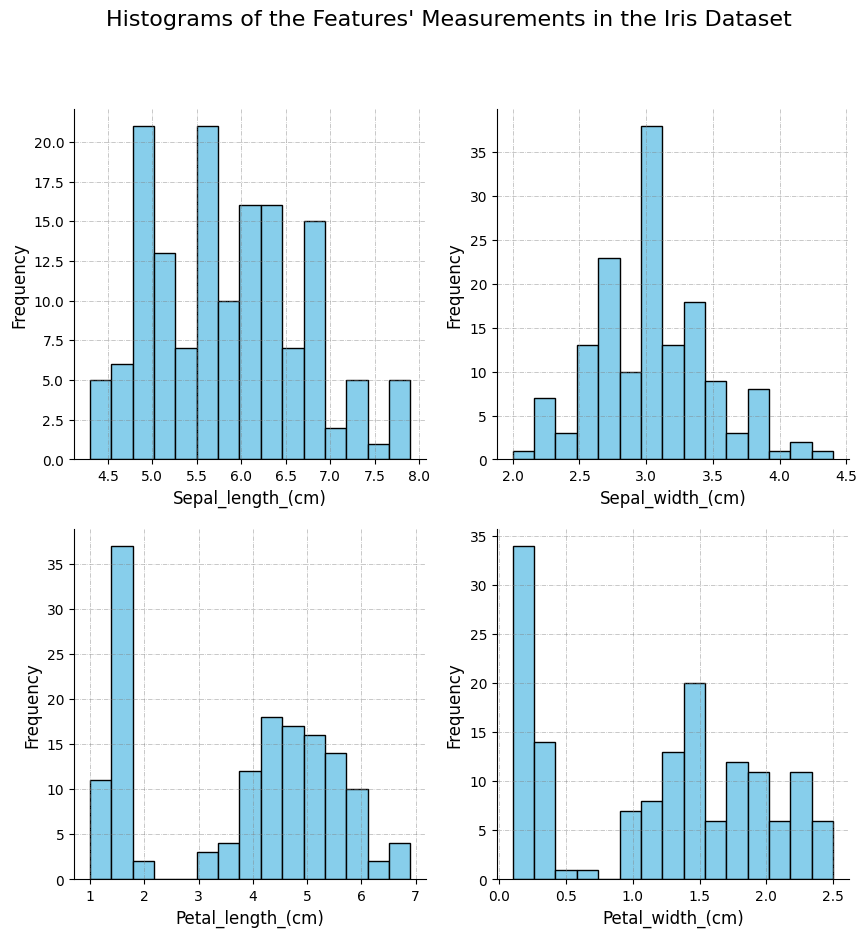

In [10]:
# Define a layout of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# Go through each axis in the previously defined layout 
# and plot a histogram of each feature
for count, ax in enumerate(axs.flat):
    
    # Remove axes splines 
    for s in ['top', 'right']: 
        ax.spines[s].set_visible(False) 
    
    # Add x, y gridlines 
    ax.grid(color ='grey', 
            linestyle ='-.', linewidth = 0.5, 
            alpha = 0.6) 

    # Plot a histogram of the feature
    ax.hist(iris_data[count], bins=15, 
                    color='skyblue', edgecolor='black')
    
    # Set the names of x and y axis and title
    ax.set_xlabel(f"{feature_names[count].capitalize()}", fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)

# Set the title
fig.suptitle('Histograms of the Features\' Measurements in the Iris Dataset', fontsize=16)
# Show the plot
plt.savefig("histograms.png", dpi=300, bbox_inches = 'tight')
plt.show()

## Scatter Plots

In [43]:
def plot_scatter(df, ax, feature1, feature2):
    
    # Plot three scatter plots for each type
    for name in df["class"].unique():

        # Create a temporary df with details for a single type 
        temp_df = df[df["class"] == name]

        # Select x and y cordinates as petal length and width, resptectively
        x = temp_df[feature1]
        y = temp_df[feature2]

        # Plot a scatter plot with previously defined cordinates and
        # use type name as the label of the legend
        ax.scatter(x, y, label=name)

    # Set a legend
    #ax.legend(df["class"].unique())
    
    feature1_name = feature1.replace("_", " ").capitalize()
    feature2_name = feature2.replace("_", " ").capitalize()
    title = f"Scatter Plot of {feature1_name.replace(" (cm)", "")} vs {feature2_name.replace(" (cm)", "")}"
    
    # Name x and y axes and set the title of the plot
    ax.set_xlabel(feature1_name)
    ax.set_ylabel(feature2_name)
    

Set a suptitle for a main figure
https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots

Set a legend for a figure
https://stackoverflow.com/questions/74021364/how-to-use-legend-only-once-in-a-subplot-for-a-for-loop

Change the size of a figure
https://stackoverflow.com/questions/7125009/how-to-change-legend-fontsize-with-matplotlib-pyplot

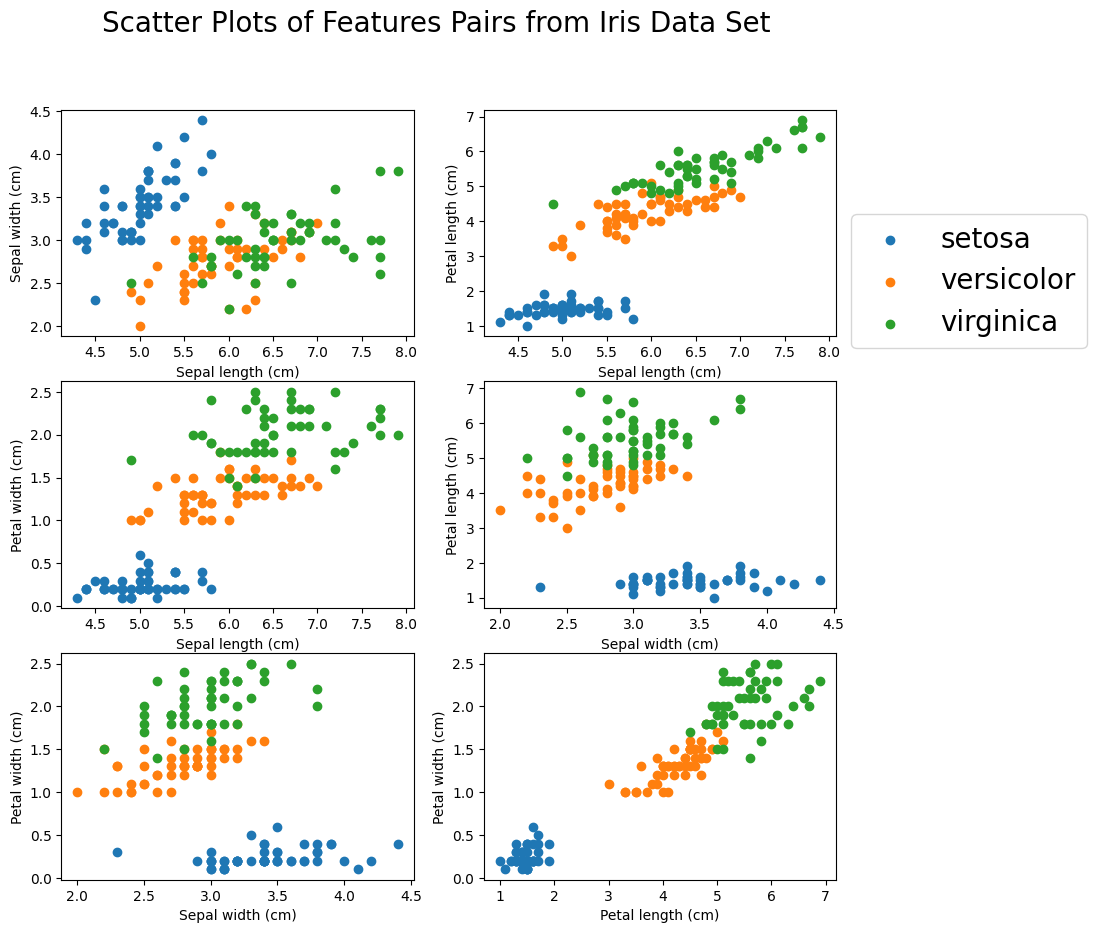

In [72]:
features = df.iloc[:,:4].columns


# Define a layout of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
axs = axs.flat
# Go through each axis in the previously defined layout 
# and plot a scatter plot of each feature
count = 0
for i in range(len(features) - 1):
    plot_scatter(df, axs[count], features[i], features[i+1])
    count += 1
    
    if i+2 < 4:
        plot_scatter(df, axs[count], features[i], features[i+2])
        count += 1
        
    if i+3 < 4:
        plot_scatter(df, axs[count], features[i], features[i+3])
        count += 1


plt.legend(df["class"].unique(), bbox_to_anchor=(1.75, 3), ncol=1, prop={'size': 20})
fig.suptitle("Scatter Plots of Features Pairs from Iris Data Set", fontsize=20)
plt.savefig("scatter_plots.png", dpi=300, bbox_inches = 'tight')
plt.show()